In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
def loss(H, x):
    return 0.5 * x.dot(H.dot(x))

def rk4(H, x0, lr, N):
    path = [x0]
    x_ = x0.copy()
    loss_path = [loss(H, x0)]
    
    for i in range(N):
        k1 = H.dot(x_)
        k2 = H.dot(x_ - 0.5 * lr * k1)
        k3 = H.dot(x_ - 0.5 * lr * k2)
        k4 = H.dot(x_ - lr * k1)

        x_ += -(1/ 6)* lr * (k1 + 2 * k2 + 2 * k3 + k4 )
        path.append(x_)
        loss_path.append(loss(H, x_))
    
    print('RK4 loss = {}'.format(loss_path[-1]))
    print('RK4 x = {}'.format(path[-1]), '\n')

    return path, loss_path

def rk2_ralston(H, x0, lr, N):
    path = [x0]
    x_ = x0.copy()
    loss_path = [loss(H, x0)]
    
    for i in range(N):
        x_ += -0.25 * lr * ( H.dot(x_) + 3 * H.dot(x_ - (2/3) * lr * H.dot(x_)) )
        path.append(x_)
        loss_path.append(loss(H, x_))
        
    print('RK2 ralston loss = {}'.format(loss_path[-1]))
    print('RK2 ralston x = {}'.format(path[-1]), '\n')

    return path, loss_path


def rk2(H, x0, lr, N):
    path = [x0]
    x_ = x0.copy()
    loss_path = [loss(H, x0)]
    
    for i in range(N):
        x_ += -0.5 * lr * ( H.dot(x_) + H.dot(x_ - lr * H.dot(x_)) )
        path.append(x_)
        loss_path.append(loss(H, x_))
        
    print('RK2 loss = {}'.format(loss_path[-1]))
    print('RK2 x = {}'.format(path[-1]), '\n')

    return path, loss_path

def grad_descent(H, x0, lr, N):
    path = [x0]
    x_ = x0.copy()
    loss_path = [loss(H, x0)]
    
    for i in range(N):
        x_ += -0.5 * lr *  H.dot(x_)
        path.append(x_)
        loss_path.append(loss(H, x_))
    
    print('Grad descent loss = {}'.format(loss_path[-1]))
    print('Grad descent x = {}'.format(path[-1]), '\n')

    return path, loss_path


RK2 loss = 6.3381560469749076e-06
RK2 x = [-0.00048609 -0.00013088  0.00036026  0.00038178  0.00021733] 

Grad descent loss = 6.338156046974907e-06
Grad descent x = [-0.00048609 -0.00013088  0.00036026  0.00038178  0.00021733] 

RK4 loss = 1.6532480018209524e-07
RK4 x = [-7.85069896e-05 -2.11376199e-05  5.81845998e-05  6.16593948e-05
  3.51006023e-05] 

RK2 ralston loss = 6.338156046974906e-06
RK2 ralston x = [-0.00048609 -0.00013088  0.00036026  0.00038178  0.00021733] 

Real loss = 1.3698505948060117e-08 , Real x = [-2.25983079e-05 -6.08448300e-06  1.67484897e-05  1.77487125e-05
  1.01037401e-05]


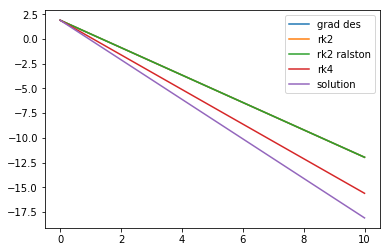

In [11]:
H = np.array([[22, 0, 0, 0, 0], 
             [0, 22, 0, 0, 0],
             [0, 0, 22, 0, 0],
             [0, 0, 0, 22, 0],
             [0, 0, 0, 0, 22]])

x_0 = np.random.randn(5)

N = 10
lr = 1/ 22

p_0, loss_0 = rk2(H, x_0, lr, N)
p_1, loss_1 = grad_descent(H, x_0, lr, N)
p_2, loss_2 = rk4(H, x_0, lr, N)
p_3, loss_3 = rk2_ralston(H, x_0, lr, N)
soln = [loss(H, np.diag(np.diag(np.exp(-t_ * H))).dot(x_0)) for t_ in np.arange(N + 1) * lr]

print('Real loss = {}'.format(soln[-1]), ', Real x = {}'.format(np.diag(np.diag(np.exp(-(N * lr ) * H))).dot(x_0)))

plt.plot(np.arange(N + 1), np.log(loss_1), label='grad des')
plt.plot(np.arange(N + 1), np.log(loss_0), label='rk2')
plt.plot(np.arange(N + 1), np.log(loss_3), label='rk2 ralston')
plt.plot(np.arange(N + 1), np.log(loss_2), label='rk4')

plt.plot(np.arange(N + 1), np.log(soln), label='solution')

plt.legend(loc='upper right')
plt.show()